<a href="https://colab.research.google.com/github/in3xes/CAP5610/blob/master/homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install surprise

     |████████████████████████████████| 11.8MB 317kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670928 sha256=c2df6594d44480babfd3a3186c6f3354703bbff68c69b1671f2fadddd6ee0eae
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [18]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNBasic, KNNWithMeans

data = Dataset.load_builtin('ml-100k')

# **Question 3.c**

In [101]:
algo = SVD(biased=False)

result_pmf = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9434  0.9536  0.9541  0.9488  0.9461  0.9492  0.0042  
MAE (testset)     0.7441  0.7518  0.7501  0.7440  0.7444  0.7469  0.0034  
Fit time          5.33    5.33    5.35    5.35    5.39    5.35    0.02    
Test time         0.13    0.14    0.14    0.38    0.14    0.19    0.10    


In [102]:
sim_options_user_msd = {'name': 'MSD', 'user_based': True}

algo_CF_user_msd = KNNWithMeans(sim_options=sim_options_user_msd, verbose=False)

result_CF_user_msd = cross_validate(algo_CF_user_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9562  0.9452  0.9489  0.9479  0.9520  0.9500  0.0037  
MAE (testset)     0.7537  0.7470  0.7478  0.7474  0.7484  0.7489  0.0025  
Fit time          0.55    0.58    0.58    0.60    0.60    0.58    0.02    
Test time         4.44    4.18    4.23    4.48    4.28    4.32    0.12    


In [103]:
sim_options_item_msd = {'name': 'MSD', 'user_based': False}

algo_CF_item_msd = KNNWithMeans(sim_options=sim_options_item_msd, verbose=False)

result_CF_item_msd = cross_validate(algo_CF_item_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9363  0.9378  0.9272  0.9318  0.9350  0.9336  0.0038  
MAE (testset)     0.7338  0.7360  0.7293  0.7337  0.7324  0.7331  0.0022  
Fit time          0.79    0.83    0.86    0.84    0.86    0.83    0.03    
Test time         4.95    5.09    4.86    5.12    4.97    5.00    0.10    


# **Question 3.d**

[500.44298850642656, 336.0470168379004, 492.0211812183972]


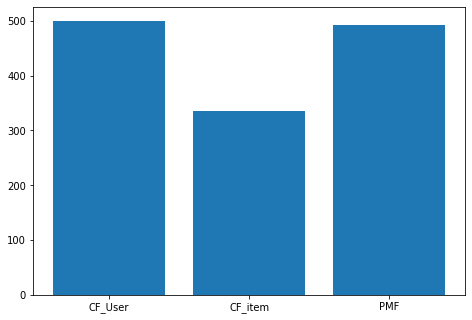

In [104]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)*10000


perf_mean = [get_perf(result_CF_user_msd['test_rmse']), get_perf(result_CF_item_msd['test_rmse']), get_perf(result_pmf['test_rmse'])]

print(perf_mean)

algos = ['CF_User', 'CF_item', 'PMF']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[0.04886146083939358, 0.0330541689832301, 0.04689803646866353]


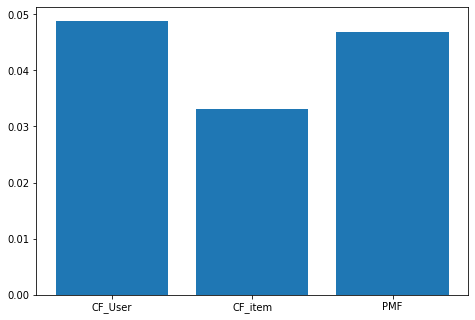

In [105]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.7)


perf_mean = [get_perf(result_CF_user_msd['test_mae']), get_perf(result_CF_item_msd['test_mae']), get_perf(result_pmf['test_mae'])]

print(perf_mean)

algos = ['CF_User', 'CF_item', 'PMF']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

# **Question 3.e**

In [106]:
sim_options_user = {'name': 'cosine', 'user_based': True}

algo_CF_user = KNNWithMeans(sim_options=sim_options_user, verbose=False)

result_CF_user_cosine = cross_validate(algo_CF_user, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9566  0.9593  0.9486  0.9681  0.9474  0.9560  0.0076  
MAE (testset)     0.7528  0.7576  0.7488  0.7670  0.7479  0.7548  0.0070  
Fit time          1.24    1.25    1.21    1.23    1.24    1.23    0.01    
Test time         4.32    4.60    4.31    4.52    4.32    4.41    0.12    


In [107]:
sim_options_item = {'name': 'cosine', 'user_based': False}

algo_CF_item = KNNWithMeans(sim_options=sim_options_item, verbose=False)

result_CF_item_cosine = cross_validate(algo_CF_item, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9452  0.9457  0.9337  0.9467  0.9434  0.9429  0.0047  
MAE (testset)     0.7404  0.7432  0.7348  0.7438  0.7438  0.7412  0.0035  
Fit time          2.01    1.98    2.05    2.02    2.03    2.02    0.02    
Test time         4.92    5.17    4.94    4.86    5.23    5.02    0.15    


In [108]:
sim_options_user_pearson = {'name': 'pearson_baseline', 'user_based': True}

algo_CF_user_pearson = KNNWithMeans(sim_options=sim_options_user_pearson, verbose=False)

result_CF_user_pearson = cross_validate(algo_CF_user_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9365  0.9363  0.9321  0.9318  0.9431  0.9360  0.0041  
MAE (testset)     0.7305  0.7306  0.7257  0.7264  0.7346  0.7296  0.0032  
Fit time          1.65    1.76    1.70    1.67    1.71    1.70    0.04    
Test time         4.05    4.06    4.32    4.05    4.12    4.12    0.11    


In [109]:
sim_options_item_pearson = {'name': 'pearson_baseline', 'user_based': False}

algo_CF_item_pearson = KNNWithMeans(sim_options=sim_options_item_pearson, verbose=False)

result_CF_item_pearson = cross_validate(algo_CF_item_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9256  0.9202  0.9255  0.9193  0.9165  0.9214  0.0036  
MAE (testset)     0.7258  0.7207  0.7217  0.7200  0.7136  0.7204  0.0039  
Fit time          2.28    2.35    2.28    2.27    2.26    2.29    0.03    
Test time         4.70    4.68    4.96    4.70    4.96    4.80    0.13    


[500.44298850642656, 559.833264470665, 359.5838682317243]


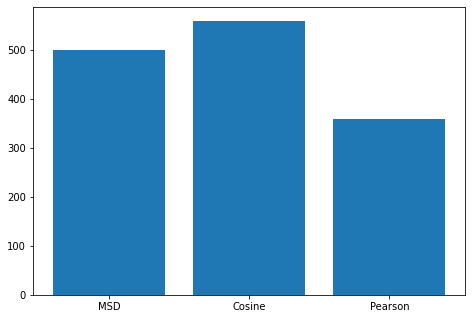

In [110]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)*10000


perf_mean = [get_perf(result_CF_user_msd['test_rmse']), get_perf(result_CF_user_cosine['test_rmse']), get_perf(result_CF_user_pearson['test_rmse'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

[336.0470168379004, 429.4019746794597, 214.39899508045147]


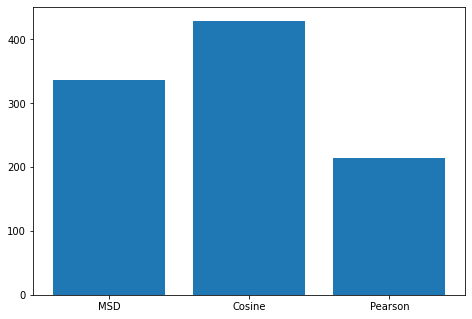

In [111]:
from statistics import mean
import matplotlib.pyplot as plt

def get_perf(res):
  return (mean(res)-0.9)*10000


perf_mean = [get_perf(result_CF_item_msd['test_rmse']), get_perf(result_CF_item_cosine['test_rmse']), get_perf(result_CF_item_pearson['test_rmse'])]

print(perf_mean)

algos = ['MSD', 'Cosine', 'Pearson']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algos,perf_mean)
plt.show()

# **Question 3.f**

K :  5
RMSE: 1.0156
K :  10
RMSE: 0.9786
K :  15
RMSE: 0.9645
K :  20
RMSE: 0.9597
K :  25
RMSE: 0.9560
K :  30
RMSE: 0.9552
K :  35
RMSE: 0.9542
K :  40
RMSE: 0.9538
K :  45
RMSE: 0.9535
K :  50
RMSE: 0.9534
K :  55
RMSE: 0.9531
K :  60
RMSE: 0.9532
K :  65
RMSE: 0.9532
K :  70
RMSE: 0.9532
K :  75
RMSE: 0.9535
K :  80
RMSE: 0.9536
K :  85
RMSE: 0.9537
K :  90
RMSE: 0.9540
K :  95
RMSE: 0.9542
K :  100
RMSE: 0.9545
K :  105
RMSE: 0.9546
K :  110
RMSE: 0.9549
K :  115
RMSE: 0.9551
K :  120
RMSE: 0.9553
K :  125
RMSE: 0.9554
K :  130
RMSE: 0.9556
K :  135
RMSE: 0.9558
K :  140
RMSE: 0.9559
K :  145
RMSE: 0.9560
K :  150
RMSE: 0.9562


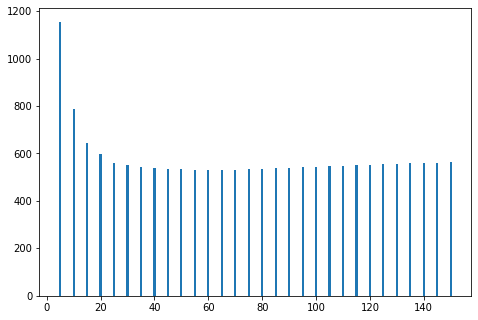

In [117]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_user = []
k = [x*5 for x in range(1, 31)]

for input_k in k:
  print("K : ", input_k)
  algo = KNNWithMeans(k=input_k, sim_options=sim_options_user_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_user.append((accuracy.rmse(predictions)-0.9)*10000)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k,results_k_user)
plt.show()

K :  5
RMSE: 1.0184
K :  10
RMSE: 0.9705
K :  15
RMSE: 0.9560
K :  20
RMSE: 0.9494
K :  25
RMSE: 0.9450
K :  30
RMSE: 0.9423
K :  35
RMSE: 0.9411
K :  40
RMSE: 0.9401
K :  45
RMSE: 0.9397
K :  50
RMSE: 0.9394
K :  55
RMSE: 0.9389
K :  60
RMSE: 0.9390
K :  65
RMSE: 0.9392
K :  70
RMSE: 0.9393
K :  75
RMSE: 0.9398
K :  80
RMSE: 0.9401
K :  85
RMSE: 0.9405
K :  90
RMSE: 0.9406
K :  95
RMSE: 0.9409
K :  100
RMSE: 0.9411
K :  105
RMSE: 0.9414
K :  110
RMSE: 0.9417
K :  115
RMSE: 0.9419
K :  120
RMSE: 0.9421
K :  125
RMSE: 0.9424
K :  130
RMSE: 0.9426
K :  135
RMSE: 0.9428
K :  140
RMSE: 0.9431
K :  145
RMSE: 0.9432
K :  150
RMSE: 0.9435


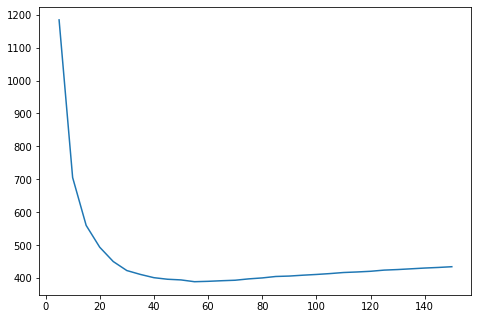

In [118]:
from surprise.model_selection import train_test_split
from surprise import accuracy


trainset, testset = train_test_split(data, test_size=.25)

results_k_item = []
k = [x*5 for x in range(1, 31)]

for input_k in k:
  print("K : ", input_k)

  algo = KNNWithMeans(k=input_k, sim_options=sim_options_item_msd, verbose=False)

  algo.fit(trainset)
  predictions = algo.test(testset)

  results_k_item.append((accuracy.rmse(predictions)-0.9)*10000)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(k, results_k_item)
plt.show()

# **Question 3.g**

In [ ]:
from surprise.model_selection import GridSearchCV

k = [x*5 for x in range(1, 31)]

param_grid_user = {'k': k,
              'sim_options': {'user_based': [True]},
              'verbose' : [False]
              }

gs_user = GridSearchCV(KNNWithMeans, param_grid_user, measures=['rmse'], cv=3)

gs_user.fit(data)

print(gs_user.best_score['rmse'])
print(gs_user.best_params['rmse'])

In [ ]:
from surprise.model_selection import GridSearchCV

k = [x*5 for x in range(1, 31)]
param_grid_item = {'k': k,
              'sim_options': {'user_based': [False]},
              'verbose' : [False]
              }

gs_item = GridSearchCV(KNNWithMeans, param_grid_item, measures=['rmse', 'mae'], cv=3)

gs_item.fit(data)

print(gs_item.best_score['rmse'])
print(gs_item.best_params['rmse'])